In [1]:
!python -m pip install prophet


[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

/Users/zlim/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
avocado_df = pd.read_csv('avocado.csv')

In [4]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
avocado_df = avocado_df.sort_values('Date')

In [7]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


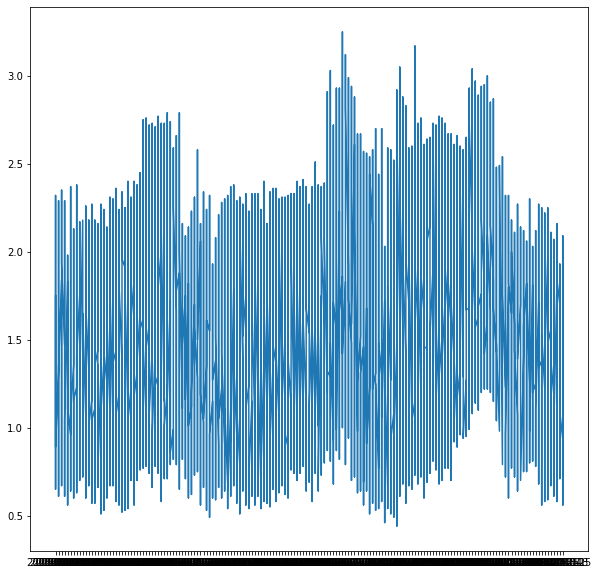

In [8]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

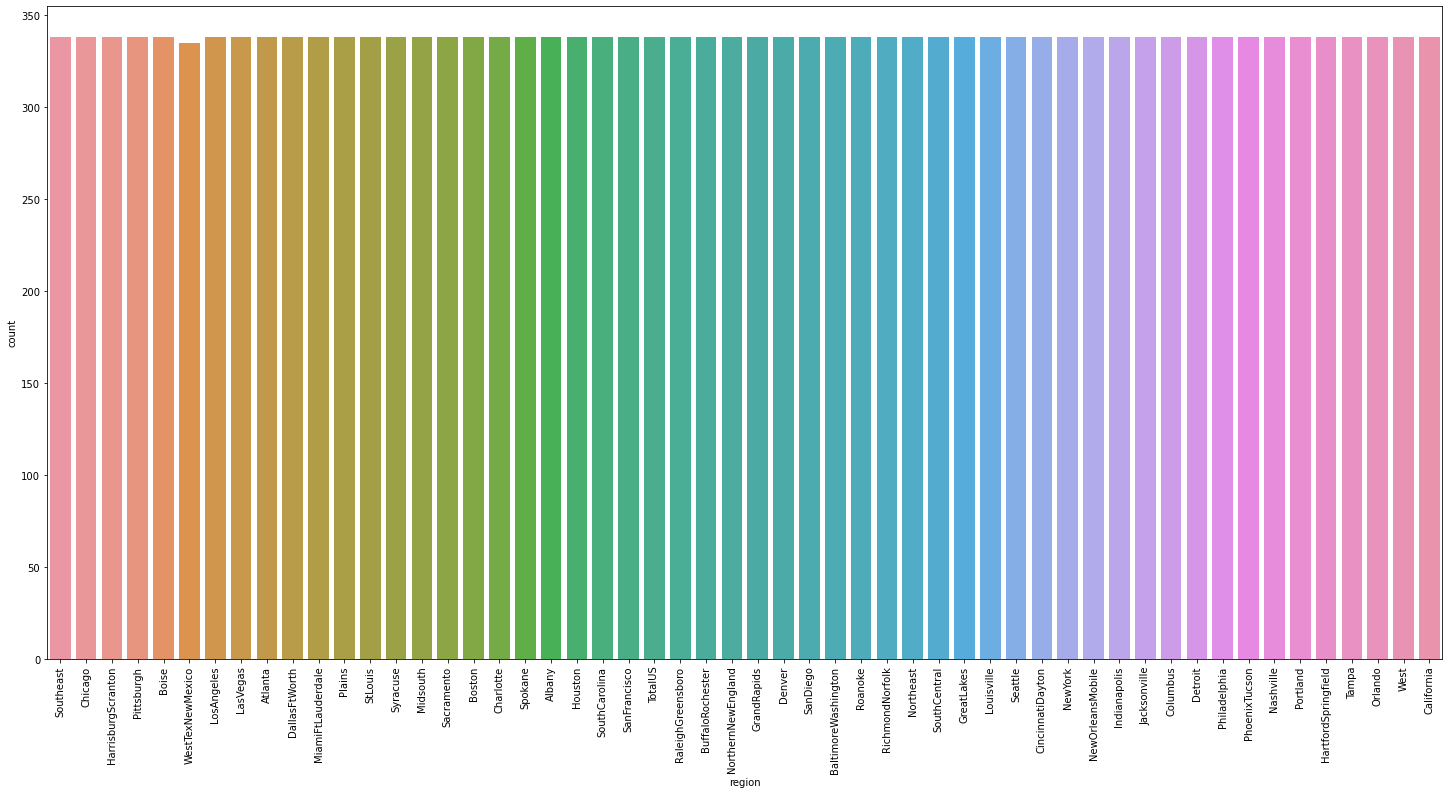

In [9]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='year', ylabel='count'>

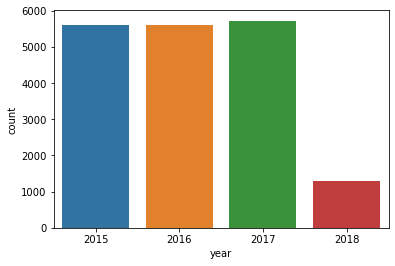

In [10]:
sns.countplot(x= 'year', data=avocado_df)

In [11]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [12]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [13]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [14]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [15]:
p = Prophet()

In [16]:
p.fit(avocado_prophet_df)

12:32:01 - cmdstanpy - INFO - Chain [1] start processing
12:32:04 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
#forecasting
future = p.make_future_dataframe(periods = 365)
forecast = p.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498071,0.901407,1.859015,1.498071,1.498071,-0.113742,-0.113742,-0.113742,-0.113742,-0.113742,-0.113742,0.0,0.0,0.0,1.384329
1,2015-01-11,1.492916,0.922495,1.856886,1.492916,1.492916,-0.105268,-0.105268,-0.105268,-0.105268,-0.105268,-0.105268,0.0,0.0,0.0,1.387648
2,2015-01-18,1.487760,0.894902,1.846194,1.487760,1.487760,-0.104935,-0.104935,-0.104935,-0.104935,-0.104935,-0.104935,0.0,0.0,0.0,1.382825
3,2015-01-25,1.482605,0.877990,1.841574,1.482605,1.482605,-0.123916,-0.123916,-0.123916,-0.123916,-0.123916,-0.123916,0.0,0.0,0.0,1.358689
4,2015-02-01,1.477450,0.808084,1.812892,1.477450,1.477450,-0.152309,-0.152309,-0.152309,-0.152309,-0.152309,-0.152309,0.0,0.0,0.0,1.325141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.168483,0.545097,1.562023,0.978529,1.353357,-0.086487,-0.086487,-0.086487,-0.086487,-0.086487,-0.086487,0.0,0.0,0.0,1.081996
530,2019-03-22,1.167765,0.537862,1.600938,0.977085,1.353633,-0.084788,-0.084788,-0.084788,-0.084788,-0.084788,-0.084788,0.0,0.0,0.0,1.082977
531,2019-03-23,1.167048,0.559082,1.630047,0.975475,1.353899,-0.082814,-0.082814,-0.082814,-0.082814,-0.082814,-0.082814,0.0,0.0,0.0,1.084234
532,2019-03-24,1.166330,0.560601,1.639161,0.973866,1.354085,-0.080583,-0.080583,-0.080583,-0.080583,-0.080583,-0.080583,0.0,0.0,0.0,1.085747


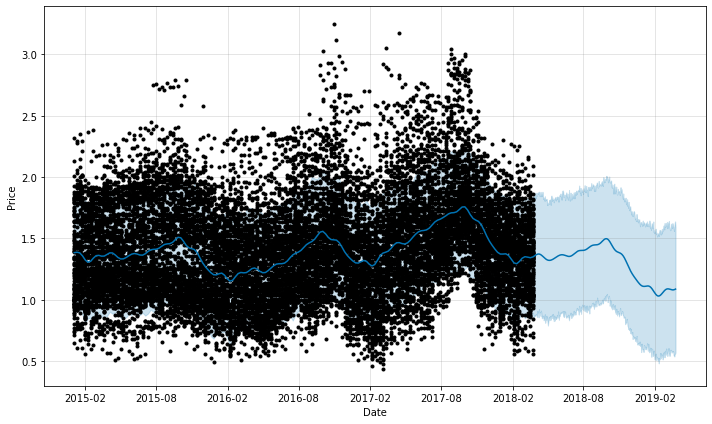

In [19]:
figure = p.plot(forecast, xlabel = 'Date', ylabel = 'Price')

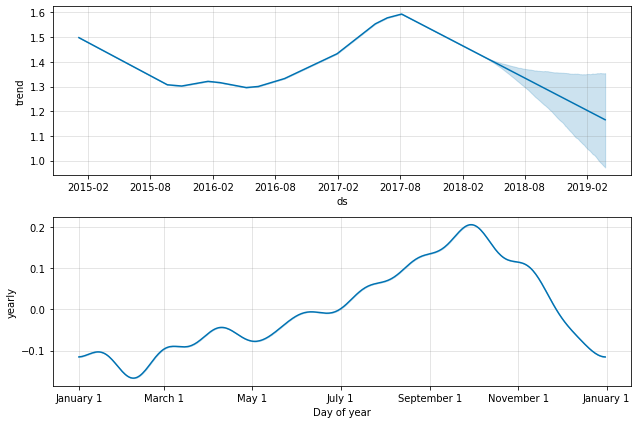

In [20]:
figure = p.plot_components(forecast)

In [22]:
avocado_df_sample = avocado_df[avocado_df['region']=='West']

In [23]:
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


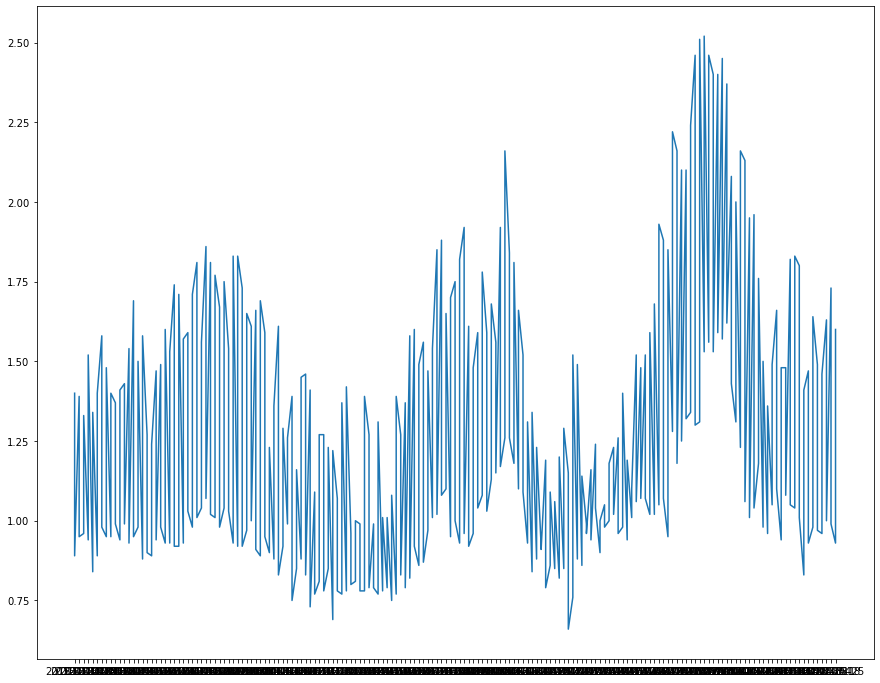

In [29]:
plt.figure(figsize=[15,12])
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [30]:
avocado_df_sample = avocado_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [31]:
avocado_df_sample

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [32]:
p = Prophet()
p.fit(avocado_df_sample)

12:47:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:22 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future = p.make_future_dataframe(periods = 365)
forecast = p.predict(future)

In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.287536,0.652486,1.567892,1.287536,1.287536,-0.187376,-0.187376,-0.187376,-0.187376,-0.187376,-0.187376,0.0,0.0,0.0,1.100160
1,2015-01-11,1.285291,0.700902,1.553964,1.285291,1.285291,-0.171276,-0.171276,-0.171276,-0.171276,-0.171276,-0.171276,0.0,0.0,0.0,1.114015
2,2015-01-18,1.283046,0.685872,1.562606,1.283046,1.283046,-0.162733,-0.162733,-0.162733,-0.162733,-0.162733,-0.162733,0.0,0.0,0.0,1.120313
3,2015-01-25,1.280801,0.686952,1.538720,1.280801,1.280801,-0.174084,-0.174084,-0.174084,-0.174084,-0.174084,-0.174084,0.0,0.0,0.0,1.106717
4,2015-02-01,1.278555,0.657247,1.510875,1.278555,1.278555,-0.195100,-0.195100,-0.195100,-0.195100,-0.195100,-0.195100,0.0,0.0,0.0,1.083455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.724219,1.095692,1.911810,1.690002,1.757320,-0.206822,-0.206822,-0.206822,-0.206822,-0.206822,-0.206822,0.0,0.0,0.0,1.517397
530,2019-03-22,1.724777,1.089402,1.938809,1.690412,1.757998,-0.201823,-0.201823,-0.201823,-0.201823,-0.201823,-0.201823,0.0,0.0,0.0,1.522953
531,2019-03-23,1.725335,1.105256,1.951432,1.690831,1.758676,-0.196261,-0.196261,-0.196261,-0.196261,-0.196261,-0.196261,0.0,0.0,0.0,1.529075
532,2019-03-24,1.725894,1.108466,1.994455,1.691259,1.759354,-0.190237,-0.190237,-0.190237,-0.190237,-0.190237,-0.190237,0.0,0.0,0.0,1.535657


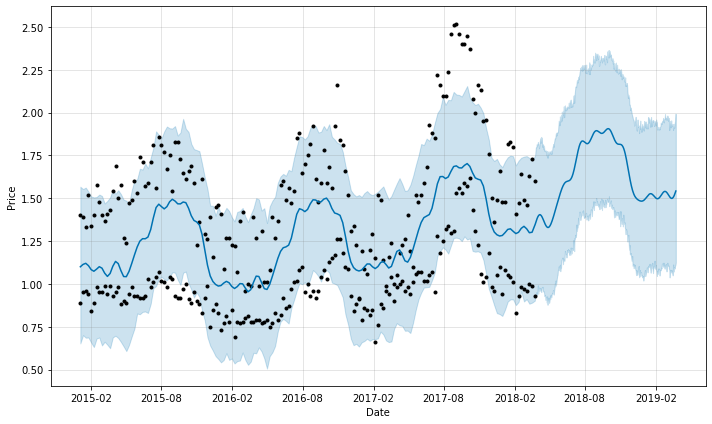

In [36]:
figure = p.plot(forecast, xlabel='Date', ylabel='Price')

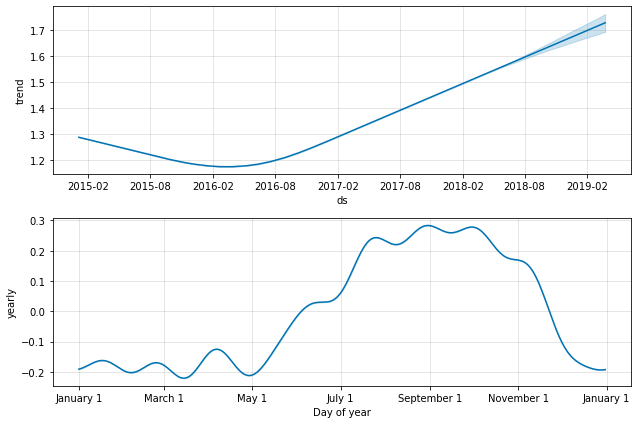

In [37]:
figure = p.plot_components(forecast)